<a href="https://colab.research.google.com/github/mdavistr-cmu/Davis-Troller_DSPN_S25/blob/main/ExerciseSubmissions/Davis-Troller_Exercise16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/selecting-the-best-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [5]:

set.seed(15)

n <- 100

# predictor X and noise epsilon
X <- rnorm(n, mean = 0, sd = 1)
epsilon <- rnorm(n, mean = 0, sd = 1)

# coefficients
beta0 <- 1
beta1 <- 2
beta2 <- -1
beta3 <- 0.5


Y <- beta0 + beta1 * X + beta2 * X^2 + beta3 * X^3 + epsilon


data <- data.frame(X = X, Y = Y)


head(data)



,X,Y
,<dbl>,<dbl>
1,0.2588229,1.419300
2,1.8311207,4.349458
3,-0.3396186,-1.022244
4,0.8971982,3.815877
5,0.4880163,2.875094
6,-1.2553858,-4.410779


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [6]:
install.packages("leaps")
library(leaps)


poly_data <- data.frame(X = X)
for (i in 2:10) {
  poly_data[[paste0("X", i)]] <- X^i
}
poly_data$Y <- Y


best_fit <- regsubsets(Y ~ ., data = poly_data, nvmax = 10)

summary_best <- summary(best_fit)
print(summary_best)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Subset selection object
Call: regsubsets.formula(Y ~ ., data = poly_data, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  "*" " " " " " " " " " " " " " " " " " "
2  ( 1 )  "*" " " " " "*" " " " " " " " " " " " "
3  ( 1 )  "*" " " "*" "*" " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 )  "*" " " "*" " " "*" "*" " " "*" " " "*"
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" " " "*"
9  ( 1 )  "*" "*" " " "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*"

In [7]:
"# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

ERROR: Error in parse(text = input): <text>:1:1: unexpected INCOMPLETE_STRING
6: 
7: ```
   ^


c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

Best model by Cp has 4 predictors
Best model by BIC has 3 predictors
Best model by Adjusted R² has 7 predictors
(Intercept)           X          X3          X4 
  0.3808542   2.0090539   0.4985483  -0.1857347 


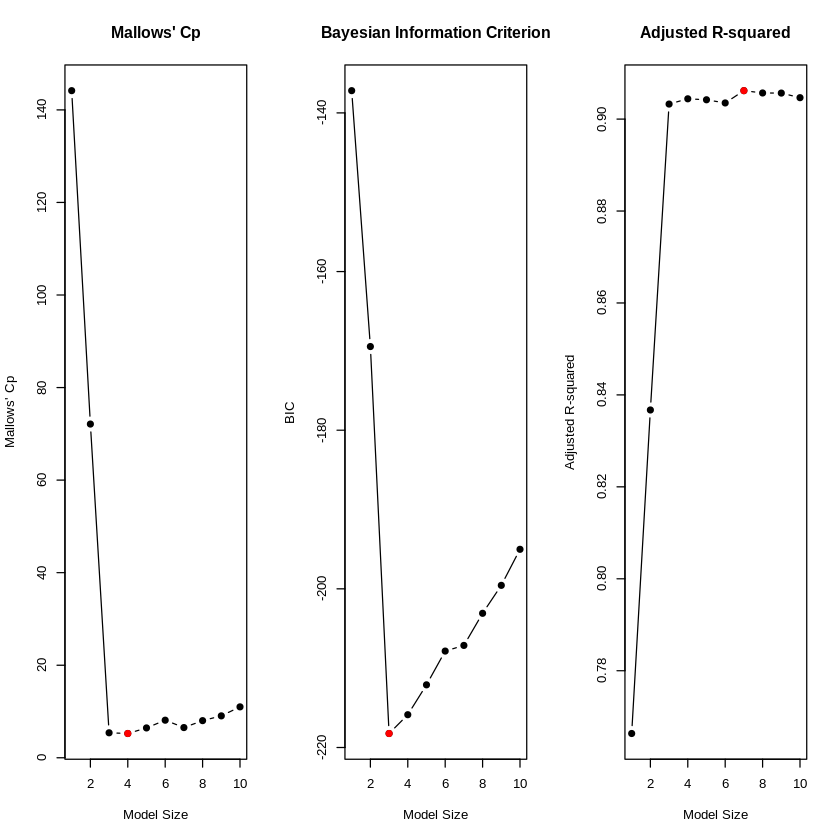

In [8]:

cp_vals <- summary_best$cp
bic_vals <- summary_best$bic
adjr2_vals <- summary_best$adjr2


par(mfrow = c(1, 3))

plot(cp_vals, type = "b", pch = 19, xlab = "Model Size", ylab = "Mallows' Cp",
     main = "Mallows' Cp")
points(which.min(cp_vals), cp_vals[which.min(cp_vals)], col = "red", pch = 19)

plot(bic_vals, type = "b", pch = 19, xlab = "Model Size", ylab = "BIC",
     main = "Bayesian Information Criterion")
points(which.min(bic_vals), bic_vals[which.min(bic_vals)], col = "red", pch = 19)

plot(adjr2_vals, type = "b", pch = 19, xlab = "Model Size", ylab = "Adjusted R-squared",
     main = "Adjusted R-squared")
points(which.max(adjr2_vals), adjr2_vals[which.max(adjr2_vals)], col = "red", pch = 19)

best_cp_model <- which.min(cp_vals)
best_bic_model <- which.min(bic_vals)
best_adjr2_model <- which.max(adjr2_vals)

cat("Best model by Cp has", best_cp_model, "predictors\n")
cat("Best model by BIC has", best_bic_model, "predictors\n")
cat("Best model by Adjusted R² has", best_adjr2_model, "predictors\n")

best_model_size <- best_bic_model
best_model_coeffs <- coef(best_fit, best_model_size)
print(best_model_coeffs)


> The 3rd model is the best.

1.   $\beta_0$ = 0.3808542
2.   $\beta_1$ = 2.0090539
3.   $\beta_3$ = 0.4985483
4.   $\beta_4$ = -0.1857347



>

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

Best Forward Model Coefficients:
(Intercept)           X          X3          X4 
  0.3808542   2.0090539   0.4985483  -0.1857347 


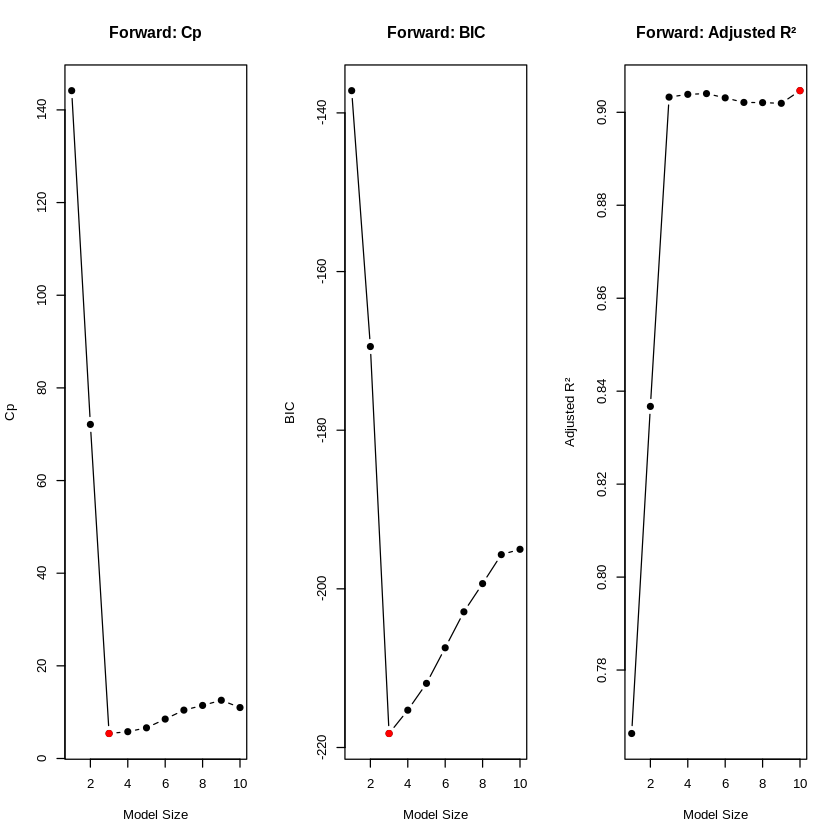

In [9]:
library(leaps)


forward_fit <- regsubsets(Y ~ ., data = poly_data, nvmax = 10, method = "forward")
forward_summary <- summary(forward_fit)

par(mfrow = c(1, 3))

plot(forward_summary$cp, type = "b", pch = 19, xlab = "Model Size", ylab = "Cp", main = "Forward: Cp")
points(which.min(forward_summary$cp), min(forward_summary$cp), col = "red", pch = 19)

plot(forward_summary$bic, type = "b", pch = 19, xlab = "Model Size", ylab = "BIC", main = "Forward: BIC")
points(which.min(forward_summary$bic), min(forward_summary$bic), col = "red", pch = 19)

plot(forward_summary$adjr2, type = "b", pch = 19, xlab = "Model Size", ylab = "Adjusted R²", main = "Forward: Adjusted R²")
points(which.max(forward_summary$adjr2), max(forward_summary$adjr2), col = "red", pch = 19)

best_forward_size <- which.min(forward_summary$bic)  # or use Cp / adjr2
forward_coeffs <- coef(forward_fit, best_forward_size)
cat("Best Forward Model Coefficients:\n")
print(forward_coeffs)





b) Backwards stepwise selection:

Best Backward Model Coefficients:
(Intercept)           X          X2          X5          X6          X7 
 0.59814290  2.28224283 -0.54726429  0.22256438 -0.01604063 -0.02528877 


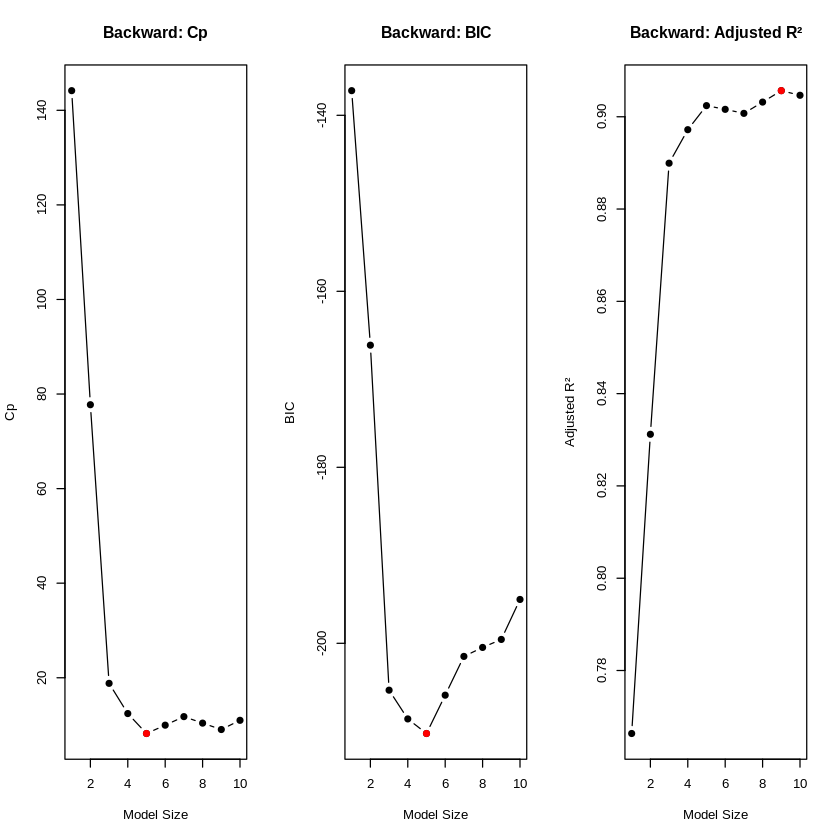

In [10]:
backward_fit <- regsubsets(Y ~ ., data = poly_data, nvmax = 10, method = "backward")
backward_summary <- summary(backward_fit)

par(mfrow = c(1, 3))

plot(backward_summary$cp, type = "b", pch = 19, xlab = "Model Size", ylab = "Cp", main = "Backward: Cp")
points(which.min(backward_summary$cp), min(backward_summary$cp), col = "red", pch = 19)

plot(backward_summary$bic, type = "b", pch = 19, xlab = "Model Size", ylab = "BIC", main = "Backward: BIC")
points(which.min(backward_summary$bic), min(backward_summary$bic), col = "red", pch = 19)

plot(backward_summary$adjr2, type = "b", pch = 19, xlab = "Model Size", ylab = "Adjusted R²", main = "Backward: Adjusted R²")
points(which.max(backward_summary$adjr2), max(backward_summary$adjr2), col = "red", pch = 19)


best_backward_size <- which.min(backward_summary$bic)  # or use Cp / adjr2
backward_coeffs <- coef(backward_fit, best_backward_size)
cat("Best Backward Model Coefficients:\n")
print(backward_coeffs)


c) Compare your results from parts a and b with those of question 1.

> The best forward model is the same as the best subset selection. The best backwards model is different. It chose the fifth model.

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [11]:
set.seed(15)


n <- 1000
p <- 20

X <- matrix(rnorm(n * p), nrow = n, ncol = p)


beta <- c(runif(5, -2, 2), rep(0, p - 5))  # 5 non-zero, 15 zero
beta <- sample(beta)


epsilon <- rnorm(n)


Y <- X %*% beta + epsilon
Y <- as.vector(Y)


X_train <- X[1:100, ]
Y_train <- Y[1:100]

X_test <- X[101:1000, ]
Y_test <- Y[101:1000]


train_df <- data.frame(Y = Y_train, X_train)
test_df <- data.frame(Y = Y_test, X_test)



b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

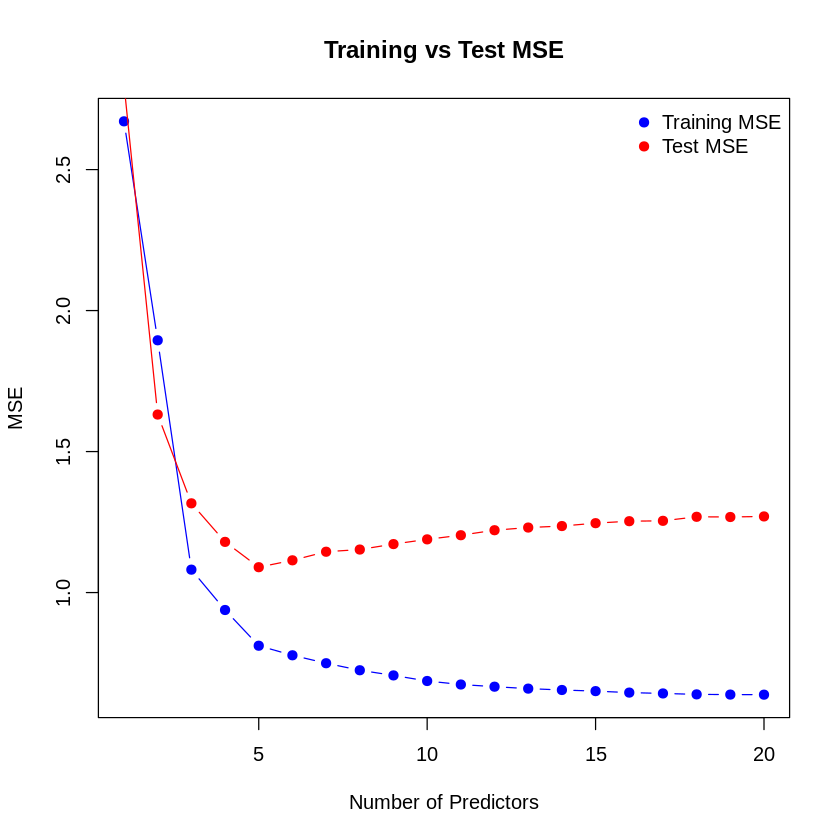

In [12]:

best_subset <- regsubsets(Y ~ ., data = train_df, nvmax = 20)


X_train_full <- model.matrix(Y ~ ., data = train_df)
X_test_full <- model.matrix(Y ~ ., data = test_df)


train_mse <- rep(NA, 20)
test_mse <- rep(NA, 20)


for (i in 1:20) {
  coef_i <- coef(best_subset, id = i)

  pred_train <- X_train_full[, names(coef_i)] %*% coef_i
  train_mse[i] <- mean((train_df$Y - pred_train)^2)

  pred_test <- X_test_full[, names(coef_i)] %*% coef_i
  test_mse[i] <- mean((test_df$Y - pred_test)^2)
}


plot(1:20, train_mse, type = "b", pch = 19, col = "blue",
     xlab = "Number of Predictors", ylab = "MSE",
     main = "Training vs Test MSE")
lines(1:20, test_mse, type = "b", pch = 19, col = "red")
legend("topright", legend = c("Training MSE", "Test MSE"),
       col = c("blue", "red"), pch = 19, bty = "n")




c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [13]:
best_model_size <- which.min(test_mse)
cat("Best model size based on test MSE:", best_model_size, "\n")
best_model_coefs <- coef(best_subset, id = best_model_size)
print(best_model_coefs)
which(beta != 0)
names(best_model_coefs)[-1]




Best model size based on test MSE: 5 
(Intercept)          X5          X6          X7         X19         X20 
  0.1266992   0.3216926   1.8914434  -0.8393118  -1.0578108  -0.3711414 


[1]  5  6  7 19 20

[1] "X5"  "X6"  "X7"  "X19" "X20"

> This model also has one additional parameter than the actual model used to simulate the dataset.

>

**DUE:** 5pm EST, April 7, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*